In [108]:
import numpy as np
import pandas as pd
from sklearn import *

# Diffrent classifiers
from sklearn.linear_model import LinearRegression  
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Process data and handle classsification size and accuracy
from sklearn import preprocessing
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



""""
Categories:
-----------
danceability
energy
key
loudness
mode
speechiness
acousticness
label
"""



songs = pd.read_csv('training_data.csv')
songsToClassify = pd.read_csv('songs_to_classify.csv')

# Set the "Label to make predictions agains"
# We now make "x" (Song dataset with out labels) and "y" (labels - like/dislike)
label = songs.label                         # y
features = songs.drop(columns='label')          # X
y = label
X = features

# Rescale the data features with min-max for improved accuracy 
# KNN classifier with "Min-Max" =  0.78
sc = MinMaxScaler()
X = sc.fit_transform(X)
songsToClassify = sc.fit_transform(songsToClassify)

# KNN classifier with "normalize" =  0.67
# X = preprocessing.normalize(X)
# songsToClassify = preprocessing.normalize(songsToClassify)

# KNN classifier, No normalizing = 0.57






# Test diffrent methods:
"""
1) Logistic Regression: Logistic Regression, Naive Bayes Classifier
2) Discriminant analysis: LDA, QDA
3) Decision Trees <- Especially Bagging, but also reandomForrest
4) Boosted Trees  <- Boosting seemed to do very well
5) Random Forest  <- Seemed good
6) K-Nearest Neighbor
-------------------
7) Neural Networks
8) Support Vector Machines (SVM) <- Good, but not learned yet

"""
#
#
#

"""

"Linear regression"
LinearRegression()

"QDA"
QuadraticDiscriminantAnalysis() 

"Naive Bayes"
GaussianNB()

"Gaussian Process"
GaussianProcessClassifier(1.0 * RBF(1.0))

"AdaBoost"
AdaBoostClassifier()

"Decision Tree"
DecisionTreeClassifier(max_depth=5)

"Random Forest", 
RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1) 

"Nearest Neighbors",
KNeighborsClassifier(n_neighbors=5) 

"Linear SVM",
SVC(kernel="linear", C=0.025) 

"RBF SVM", 
SVC(gamma=2, C=1)

"Neural Net"
MLPClassifier(alpha=1)

"""



# Initialize classifier
"""---------------------- Uncomment to test them: ----------------------"""
#clf = GaussianNB()
#clf = LinearRegression()
#QuadraticDiscriminantAnalysis() 
#GaussianNB()
#GaussianProcessClassifier(1.0 * RBF(1.0))
#AdaBoostClassifier()
#DecisionTreeClassifier(max_depth=5)
#RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
#SVC(kernel="linear", C=0.025) 
#SVC(gamma=2, C=1)
#MLPClassifier(alpha=1)

clf = KNeighborsClassifier(n_neighbors=5)




# Now lets split the data into test and training
# Needs to be in 20/80, most usual, some say 30/70... even 10/90



# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many


# We can have other "scores", for example least mean squared
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

print("\nScores from the crossvalidation is: \n", scores)
print("\n\nMedian score from the crossvalidation is: \n", scores.mean())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#print("train song ", len(X_train))
#print("train label ", len(y_train))
#print("test song ", len(X_test))
#print("test label ", len(y_test))



# Train our classifier
model = clf.fit(X_train, y_train)

# Make predictions on test
prediction = clf.predict(X_test)

 

# See test score
#print("\nCurrent accuracy is: ", accuracy_score(y_test, prediction))
#print("\Confusion matrix: \n",confusion_matrix(y_test, prediction))
#print("\n\nClassification raport \n", classification_report(y_test, prediction))



#Predict the response for test dataset
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


# Prediction in comparison of the training and test data
print("\n\n\nCurrent accuracy is from predicted values: \n", accuracy_score(y_pred, y_test))
print("\n\nPrecdicted classification from test labels: \n\n", y_pred)



print("\n\n\n =================== Now the real calssification =====================\n\n", y_pred)
# THIS IT THE PREDICTION ON THE ACTUAL SONGS TO BE CLASSIFIED!
y_songsToClassifyPred = clf.predict(songsToClassify)

# print(y_songsToClassifyPred)
formatedPrediction = ["".join(item) for item in y_songsToClassifyPred.astype(str)]
formatedPrediction = ''.join(formatedPrediction)

# HERE IS THE PREDICTED STRUNG TO SEND IN!
print("\n\n\n =================== String to be sent in =====================\n\n")
print(formatedPrediction)










Scores from the crossvalidation is: 
 [0.72368421 0.78947368 0.76       0.84       0.74666667 0.84
 0.77333333 0.88       0.7027027  0.77027027]


Median score from the crossvalidation is: 
 0.7826130867709815



Current accuracy is from predicted values: 
 0.7933333333333333


Precdicted classification from test labels: 

 [0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1
 0 0]



 =================== Now the real calssification =====================

 [0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Testing to print only prediction of correct songs

In [73]:
#print(y_songsToClassifyPred)
formatedPrediction = ["".join(item) for item in y_songsToClassifyPred.astype(str)]
formatedPrediction = ''.join(formatedPrediction)

formatedPrediction

#print(y_songsToClassifyPred)

[0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1]


'00010001101001011111101100101010011111010101111110011101100011001100101111010110110001111010011011111111010111110011111101101110101111111111111001111011001111101100110110111101111000111110100010100111'

# ----------------------------------------------------

# Plot Correlation matrix

In [106]:
# Test various things - Among other correcation matrix for whole data set and for only positive
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

onlyPositive = songs[songs['label'] == 1]
onlyNegative = songs[songs['label'] == 0]

allCorr = songs.corr()
posCorr = onlyPositive.corr()
negCorr = onlyNegative.corr()



# All labels correlation matrix

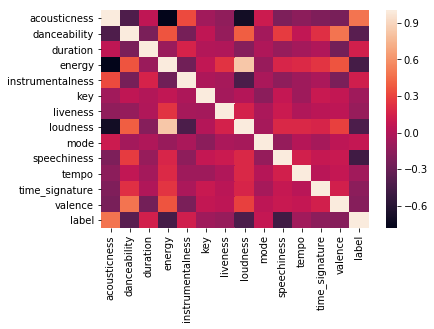

In [107]:
# plot the heatmap
sns.heatmap(allCorr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Positive labels correlation matrix

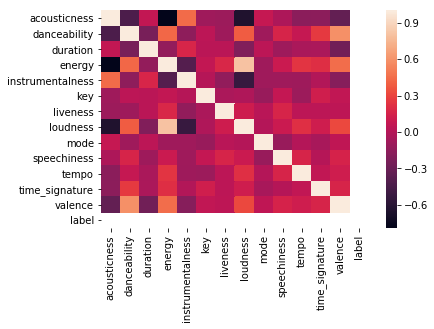

In [104]:
# plot the positive
sns.heatmap(posCorr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Negative labels correlation matrix

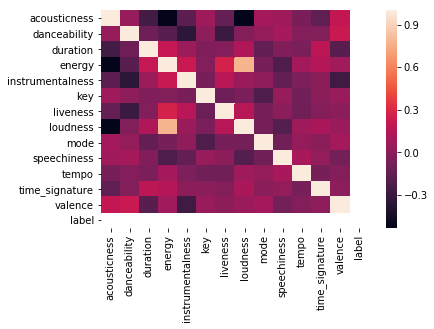

In [105]:
# plot the negative
sns.heatmap(negCorr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)